In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import kaleido
from IPython.display import Image
import networkx as nx
import seaborn as sns

In [ ]:
IMAGE_PATH = "../2_images/"
DATASET_PATH = '../0_data_files/'
file_path = DATASET_PATH + 'bar_assignment.csv'

print(f"Attempting to read file from: {file_path}")

bar_df = pd.read_csv(file_path)
bar_df.tail()

Attempting to read file from: ../0_data_files/bar_assignment.csv


,LABEL,COUNT
17,S,0
18,S,0
19,S,0
20,S,1
21,S,0


Graph saved as: ../2_images/bar_chart.png


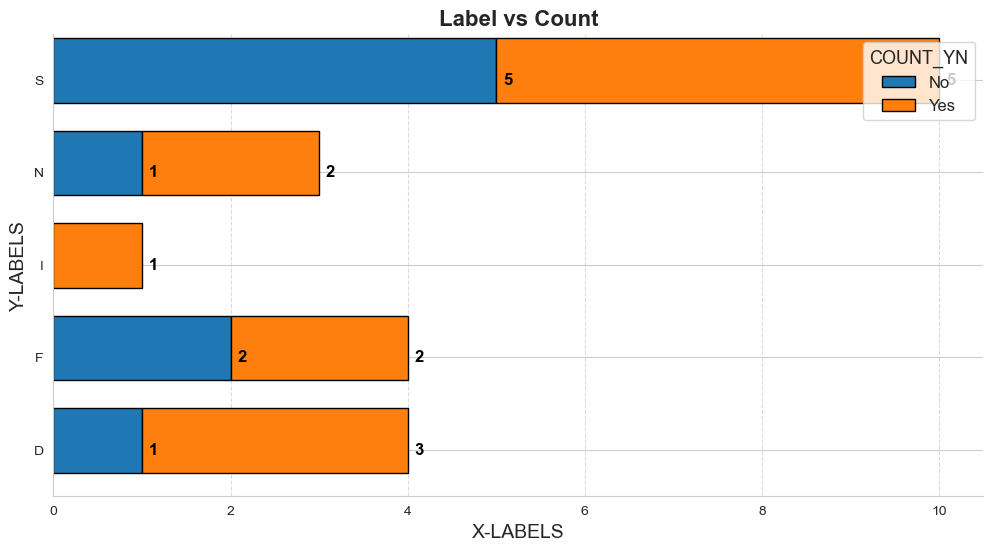

In [14]:


# Apply seaborn style for a professional look
sns.set_style("whitegrid")

# Map count to convert 0 to No and 1 to Yes
bar_df['COUNT_YN'] = bar_df['COUNT'].map({
    0: 'No',
    1: 'Yes'
})

# Creates a crosstab of Label and Count_YN
crosstab = pd.crosstab(bar_df['LABEL'], bar_df['COUNT_YN'])

# Create a stacked horizontal bar plot
fig, ax = plt.subplots(figsize=(12, 6))
crosstab.plot(
    kind='barh',
    stacked=True,
    color=['#1f77b4', '#ff7f0e'],
    ax=ax,
    edgecolor='black'
)

# Add labels to bars
for bars in ax.containers:
    ax.bar_label(
        bars,
        color='black',
        padding=5,
        fontsize=12,
        fontweight='bold',
        labels=[str(int(val)) if val > 0 else '' for val in bars.datavalues]
    )

# Modify bar thickness
for rect in ax.patches:
    rect.set_height(0.7)

# Set titles and axis labels
plt.title("Label vs Count", loc='center', fontsize=16, fontweight='bold')
plt.xlabel("X-LABELS", fontsize=14)
plt.ylabel("Y-LABELS", fontsize=14)

# Improve grid appearance
ax.grid(axis='x', linestyle='--', alpha=0.7)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust legend placement
plt.legend(title="COUNT_YN", loc='upper right', fontsize=12, title_fontsize=13)

image_filename = IMAGE_PATH + "bar_chart.png"
plt.savefig(image_filename, dpi=300, bbox_inches='tight')
print(f"Graph saved as: {image_filename}")

plt.show()  # Show the plot after saving
